# Final Project 
#### Group Members :- Aditya Kesari, Fiona Wang, Dhruv Rana

---

## 0. Import 

In [84]:
import os
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from PIL import Image
import torch
from torch.utils.data import DataLoader, random_split

## 1. Label Colors

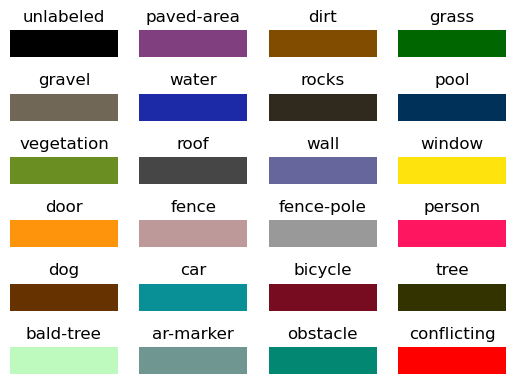

In [85]:
label_map = pd.read_csv("./archive/class_dict_seg.csv")

for index,label in enumerate(label_map["name"]):
    plt.subplot(6,4,index+1)
    (R,G,B) = label_map.iloc[index][1:]
    color = np.array([[[R,G,B],[R,G,B],[R,G,B],[R,G,B]]]) # need a MxNx4 array to use imshow to plot colors
    plt.imshow(color)
    plt.title(label)
    plt.axis("off")

plt.show()

## 2. Examine Data

In [86]:
image_dir = "./archive/dataset/semantic_drone_dataset/original_images/"
mask_dir = "./archive/RGB_color_image_masks/RGB_color_image_masks/"


images_filenames = os.listdir(image_dir)
mask_filenames = os.listdir(mask_dir)

images_df = pd.DataFrame(images_filenames, columns=["id"])
mask_df = pd.DataFrame(mask_filenames, columns=["id"])

print("Total Images in dataset: ", len(images_df))

Total Images in dataset:  400


In [87]:
id_num = 300

img = Image.open(image_dir + images_df["id"][id_num])
mask = Image.open(mask_dir + mask_df["id"][id_num])

print('Image Size', np.asarray(img).shape)
print('Mask Size', np.asarray(mask).shape)

Image Size (4000, 6000, 3)
Mask Size (4000, 6000, 3)


## 3. Example Mask

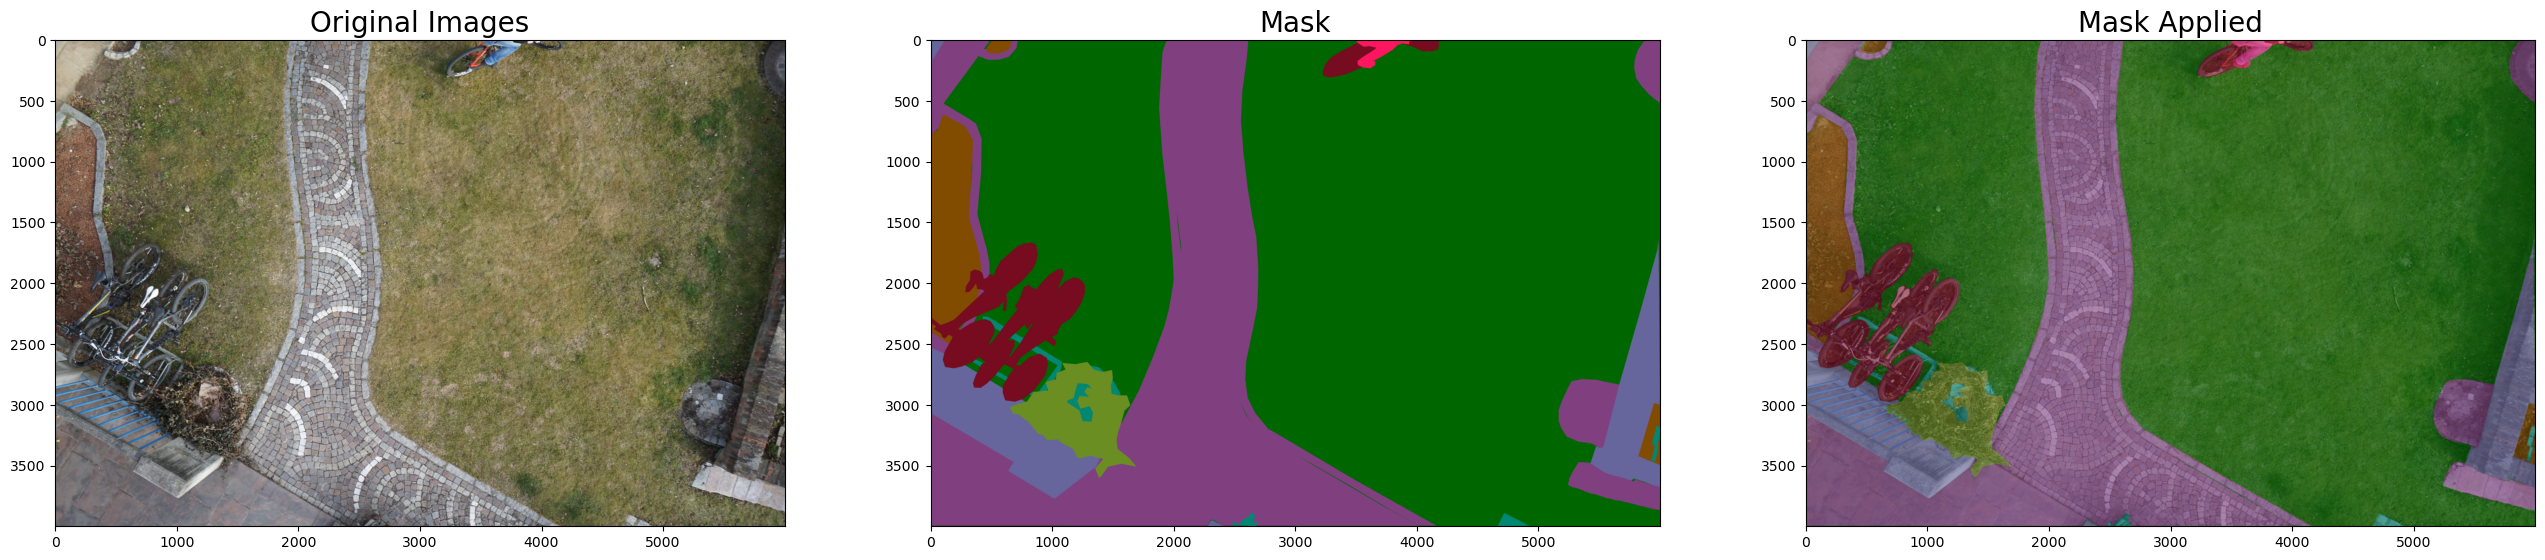

In [89]:
fig, axs = plt.subplots(1,3,figsize=(32,32))
axs[0].imshow(img)
axs[0].set_title("Original Images",size=20)

axs[1].imshow(mask)
axs[1].set_title("Mask",size=20)

axs[2].imshow(img)
axs[2].imshow(mask, alpha=0.6)
axs[2].set_title("Mask Applied",size=20)

plt.show()

## 4.Split &  Load Data

In [ ]:
TRAIN_SPLIT = 0.9
TEST_SPLIT = 0.1
DATASET_SIZE = len(images_df["id"])

In [ ]:


train_data, test_data = random_split(images_df['id'].values, [ int(TRAIN_SPLIT*DATASET_SIZE) , int(TEST_SPLIT*DATASET_SIZE)])